In [1]:
import pandas as pd
from os.path import join
import torch
from call_methods import make_network
from utils.plot_utils import plot_tsne_with_subsets, plot_mean_predictions, plot_distribution

In [2]:
path = '/Users/ed_aguilar/Documents/Github/hcatgnet/results/learning_set/results_GNN/Fold_1_test_set/Fold_2_val_set'

In [3]:
data = pd.read_csv(join(path, 'embeddings.csv'), index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,ddG_exp,ddG_pred,index,set,tSNE1,tSNE2
0,-0.006117,1.009677,0.230504,-0.003041,0.784379,0.647050,-0.001907,1.535800,-0.008041,0.873375,...,-0.008115,-0.002085,0.169812,-0.010859,8.538893,7.752192,185,training,-22.474672,-9.802017
1,-0.006630,1.176015,0.195251,-0.010393,0.821883,0.845687,-0.003149,1.564637,-0.009029,1.090926,...,-0.010275,0.033160,0.165936,-0.013384,14.662326,12.339864,359,training,-3.815729,33.612823
2,-0.005133,0.878394,1.649886,0.533875,-0.002165,-0.002388,-0.001056,0.313971,-0.005884,0.401437,...,0.072803,-0.017594,-0.019728,0.104079,-8.222192,-7.708202,420,training,24.723670,12.029326
3,-0.005299,0.895826,0.352424,-0.001651,0.788901,0.667769,-0.001990,1.492461,-0.006259,0.333043,...,-0.006543,0.095368,0.141019,-0.008176,9.809491,10.950994,467,training,-35.637867,9.166286
4,-0.005299,1.001705,0.597887,-0.001651,0.701825,0.654012,-0.001170,0.788731,-0.006259,0.078418,...,-0.007092,-0.013931,0.265512,-0.007741,9.234157,7.665795,48,training,-14.387384,-7.389633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.007424,1.741818,0.661620,-0.006169,1.127972,0.862728,-0.002546,1.764730,-0.010784,-0.000802,...,-0.010186,-0.015800,0.286725,-0.012766,-11.366404,-9.562195,632,test,-24.088148,-14.565998
63,-0.006443,0.851444,0.611593,-0.001651,0.701825,0.654012,-0.001170,1.492461,-0.010930,0.293035,...,-0.005371,0.018990,0.092676,-0.005861,9.809491,8.783476,641,test,-16.705267,-4.906676
64,-0.006117,1.009677,0.297810,-0.003041,0.743157,0.637383,-0.001460,1.535800,-0.008041,0.884165,...,-0.007200,-0.012290,0.152881,-0.009733,10.456662,9.588227,646,test,-18.595500,-6.718899
65,-0.007241,1.559277,0.527550,-0.005326,1.166589,0.964762,-0.002012,1.714289,-0.010646,0.167911,...,-0.008649,-0.011899,0.259536,-0.011011,10.206749,6.534754,657,test,-24.831310,-18.323915


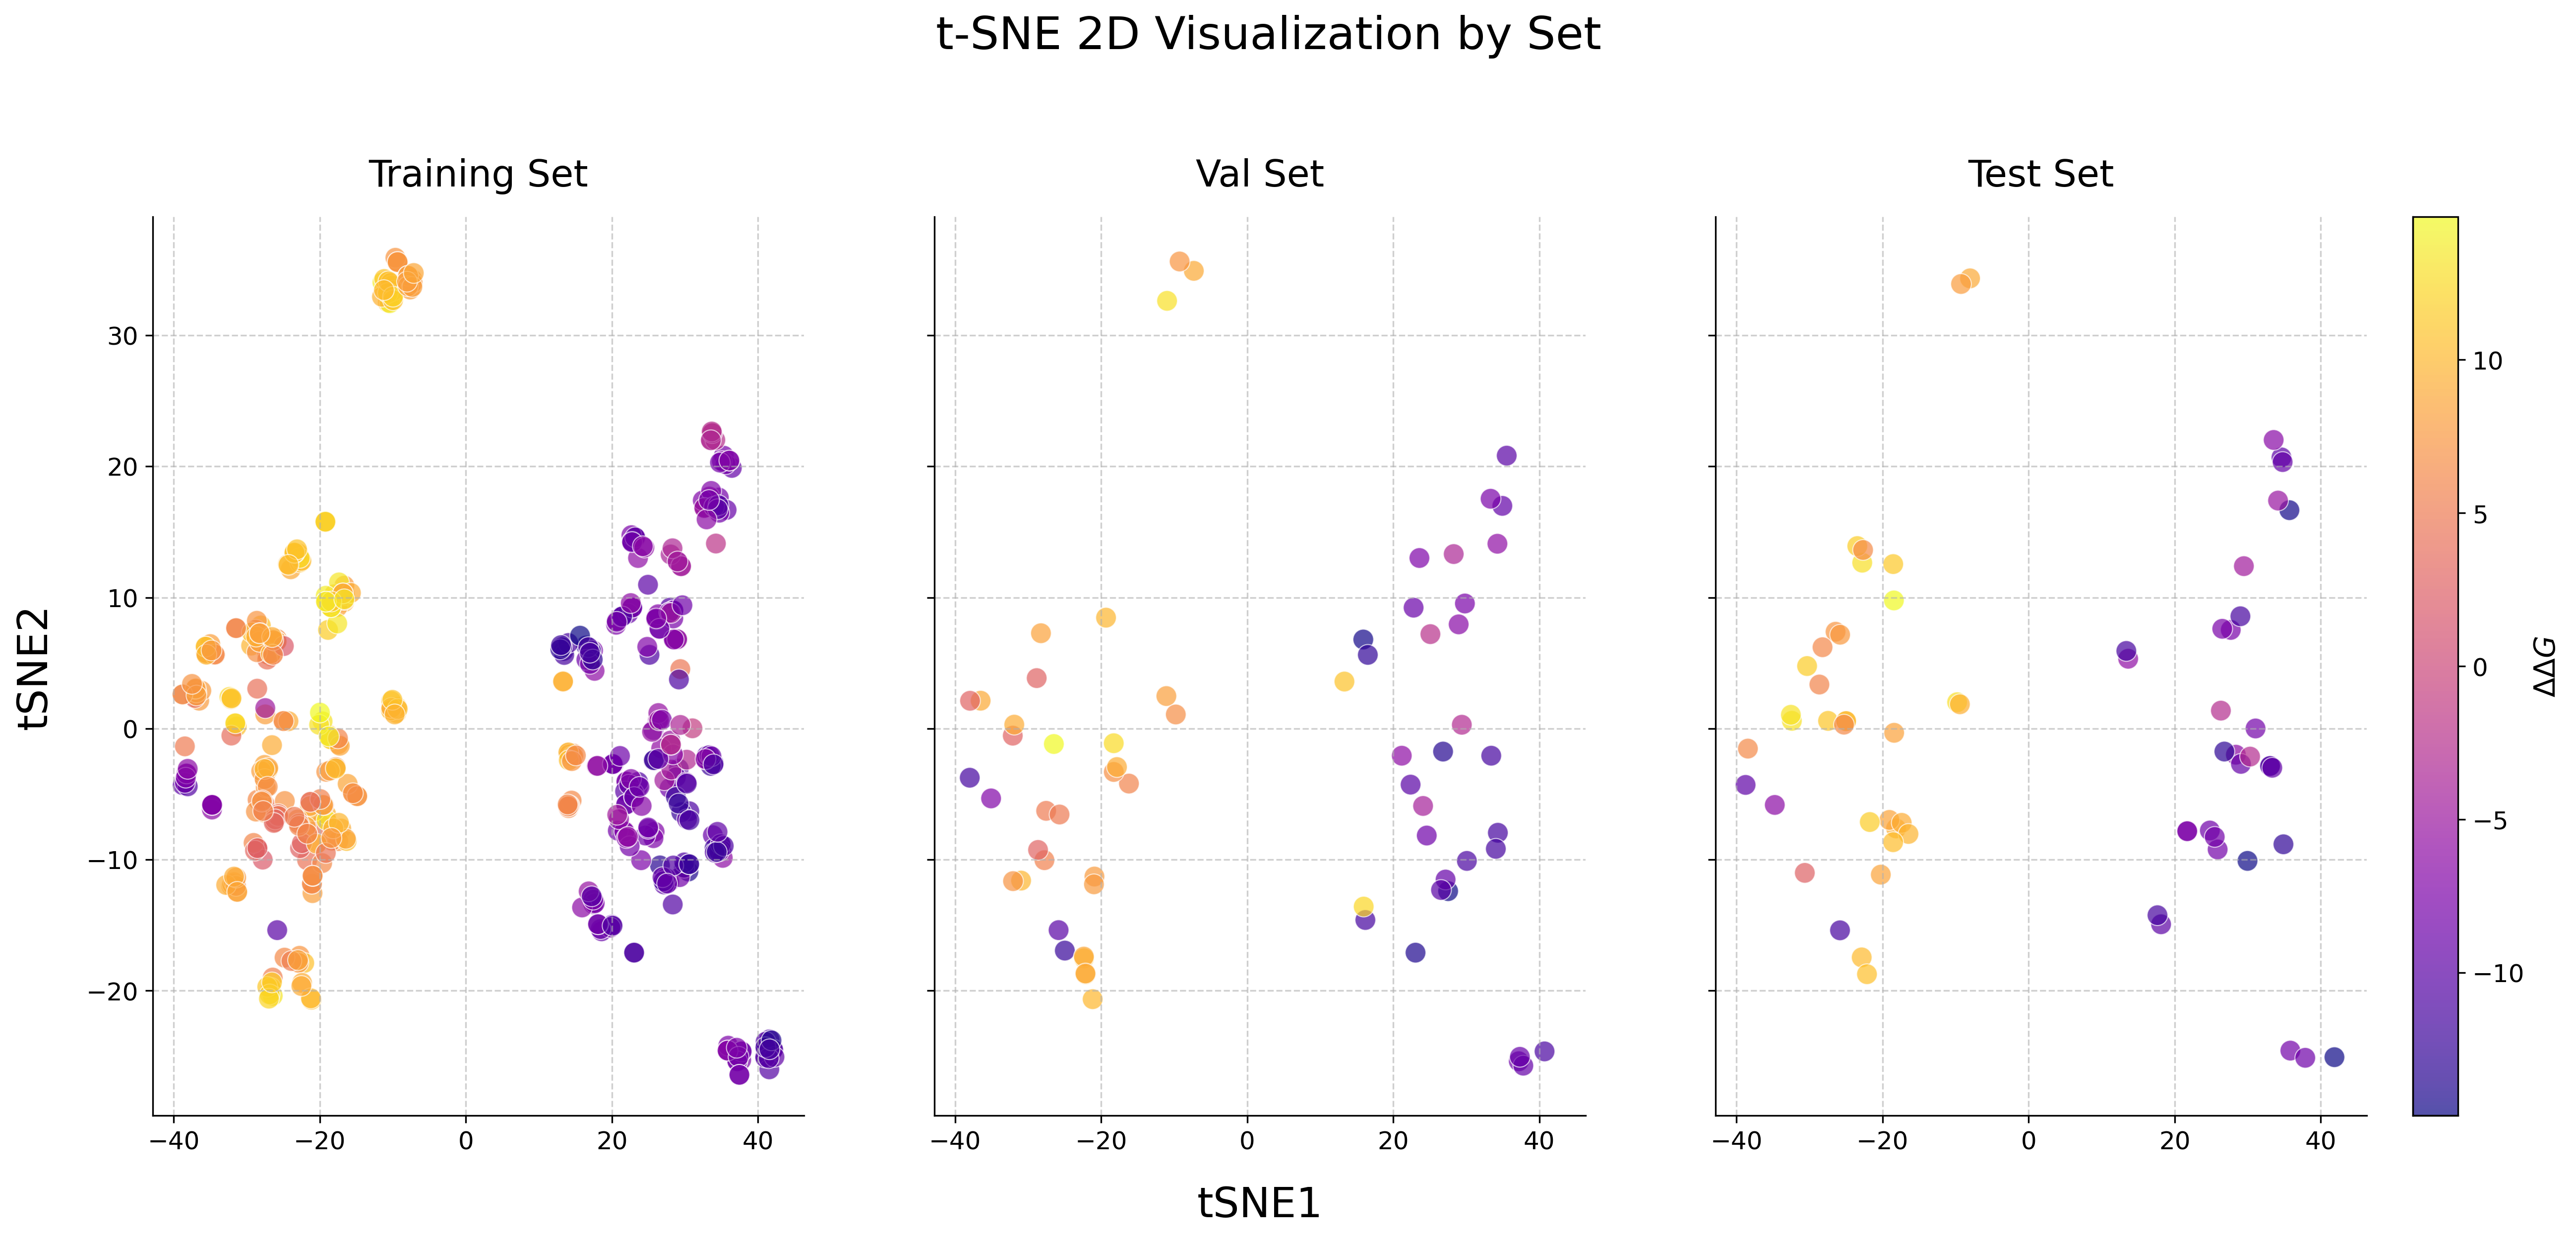

In [4]:
plot_tsne_with_subsets(data, feature_columns=[f'{i}' for i in range(128)], color_column='ddG_exp', set_column='set', show=True)

In [5]:
results_learning = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/results/learning_set/GNN_vs_gb/predictions_all.csv')

results_learning = results_learning.groupby(['index', 'Method']).agg(
    mean_predicted_ddG=('predicted_ddG', 'mean'),
    real_ddG=('real_ddG', 'first')
).reset_index()

results_learning.loc[results_learning['Method'] == 'gb', 'Method'] = 'Gradient Boosting'
results_learning.loc[results_learning['Method'] == 'GNN', 'Method'] = 'HCat-GNet'

results_learning.sample(5)

,index,Method,mean_predicted_ddG,real_ddG
91,47,Gradient Boosting,-9.465460,-5.989492
1158,585,Gradient Boosting,-6.829630,-10.373469
1223,620,HCat-GNet,-8.360289,-9.985035
534,271,HCat-GNet,9.330033,8.538893
705,359,HCat-GNet,11.976901,14.662326


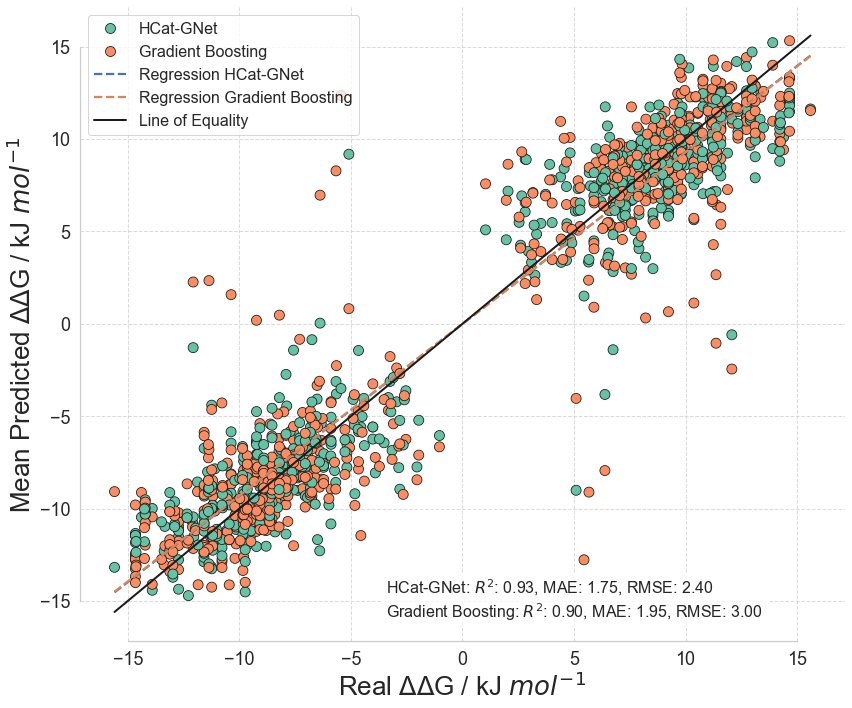

In [6]:
plot_mean_predictions(results_learning)

In [7]:
results_test = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/results/final_test/GNN_vs_gb/predictions_all.csv')

results_test = results_test.groupby(['index', 'Method']).agg(
    mean_predicted_ddG=('predicted_ddG', 'mean'),
    real_ddG=('real_ddG', 'first')
).reset_index()

results_test.loc[results_test['Method'] == 'gb', 'Method'] = 'Gradient Boosting'
results_test.loc[results_test['Method'] == 'GNN', 'Method'] = 'HCat-GNet'

results_test.sample(5)

,index,Method,mean_predicted_ddG,real_ddG
90,45,HCat-GNet,-9.696648,-5.538194
84,42,HCat-GNet,10.297190,8.761648
94,47,HCat-GNet,9.905103,1.560313
51,25,Gradient Boosting,8.501140,16.422773
65,32,Gradient Boosting,-6.697715,-12.074589


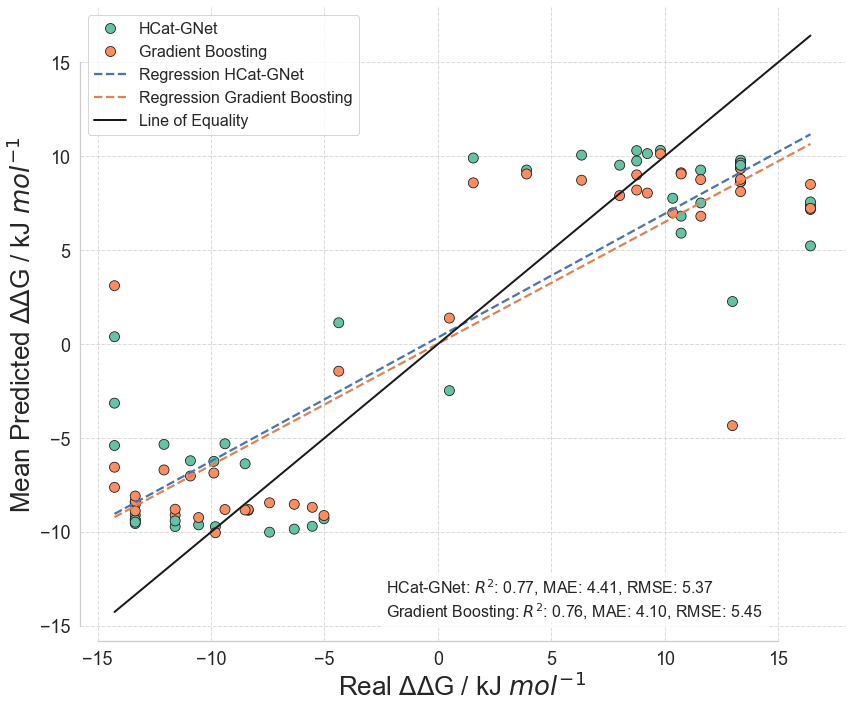

In [8]:
plot_mean_predictions(results_test)

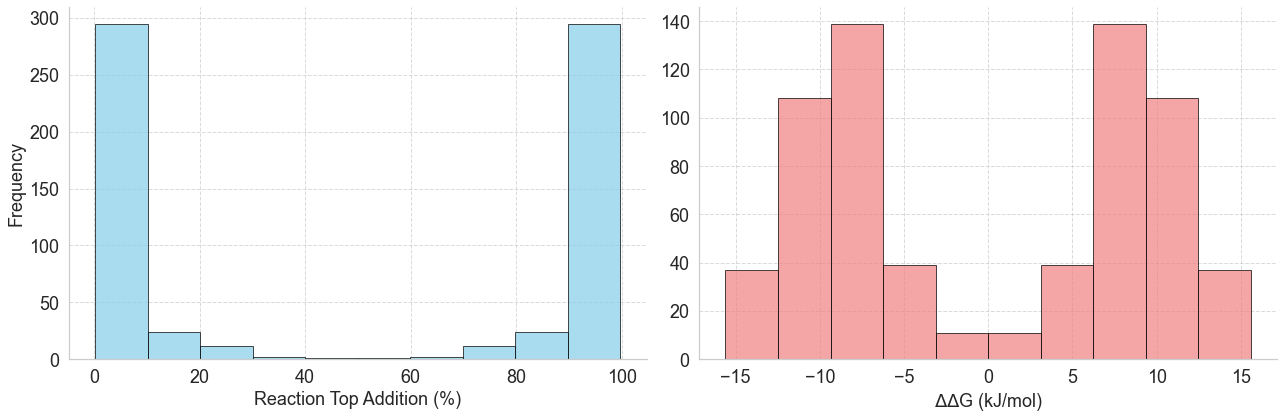

In [9]:
reactions_learning = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_learning/raw/learning.csv')
plot_distribution(reactions_learning)

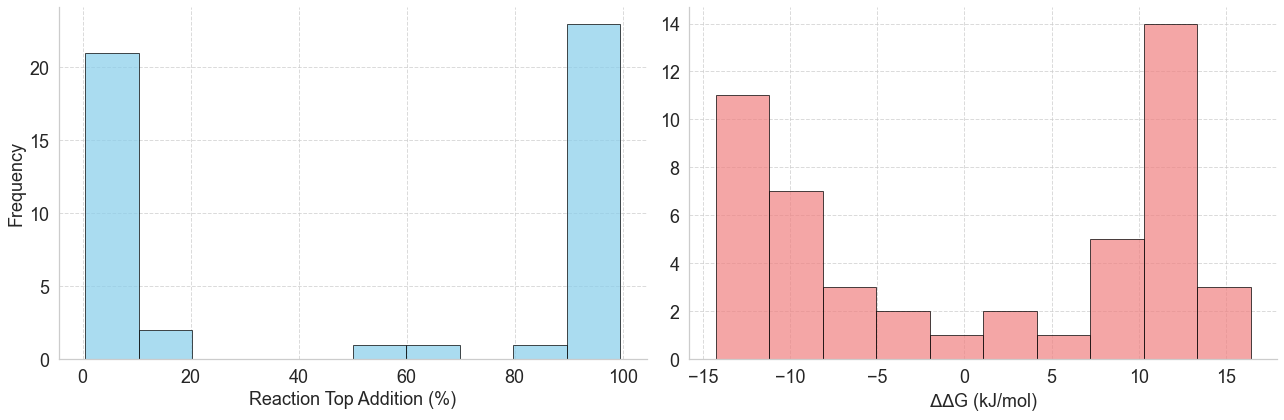

In [10]:
reactions_test = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_final_test/raw/final_test.csv')
plot_distribution(reactions_test)